# Solving kinetic equations: reservoir depletion

Our aim is to solve system of two kinetic equations:

$\frac{d\Psi(t)}{dt} = \frac{1}{2}\left(R\cdot n_R-\gamma\right)\cdot \Psi(t) -i\cdot g\cdot\lvert\Psi(t)\rvert^2\Psi(t)-i\cdot g_R\cdot n_R\cdot\Psi(t)$

$\frac{dn_R}{dt} = -\left(\gamma_R + R\cdot\lvert\Psi(t)\rvert^2\right)n_R $ 

In [56]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from odeintw import odeintw
from scipy.optimize import curve_fit

cmap = matplotlib.cm.get_cmap('Spectral')
matplotlib.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'font.size': 15}) # font size

In [57]:
def solveKinEq(t, params, P1, psi0):
    def kinEq(y1, t, params):
        psi = y1[0]
        nR = y1[1] 
        
        dpsidt = 1./2.*(R*nR - gamma)*psi - 1j*g*((np.abs(psi))**2)*psi - 1j*gR*nR*psi
        dnRdt = -(gammaR + R * (np.abs(psi))**2) * nR   
        return np. array([dpsidt, dnRdt])
    
    gamma, gR, chi, gammaR, g, R = params[0], params[1], params[2], params[3], params[4], params[5]
    
    y1 = np.array([psi0 + 1j * 0.001, P1])
    sol = odeintw(kinEq, y1, t, args = (params,))
    psi = sol[:,0]
    nr = sol[:,1]
    return np.abs(psi)**2, nr


In [58]:
#Simulation parameters
gamma = 0.06
gR = 1.0
chi = 0.5
gammaR = 0.0083
g = 0.5
R = 0.12
psi0 = 0.001 + 1j*0.001

P1 = 3
P2 = 6
P3 = 9

time = np.linspace(0,150,1000)

In [59]:
params = [gamma, gR, chi, gammaR, g, R]
sol1 = solveKinEq(time, params, P1, psi0)
sol2 = solveKinEq(time, params, P2, psi0)
sol3 = solveKinEq(time, params, P3, psi0)

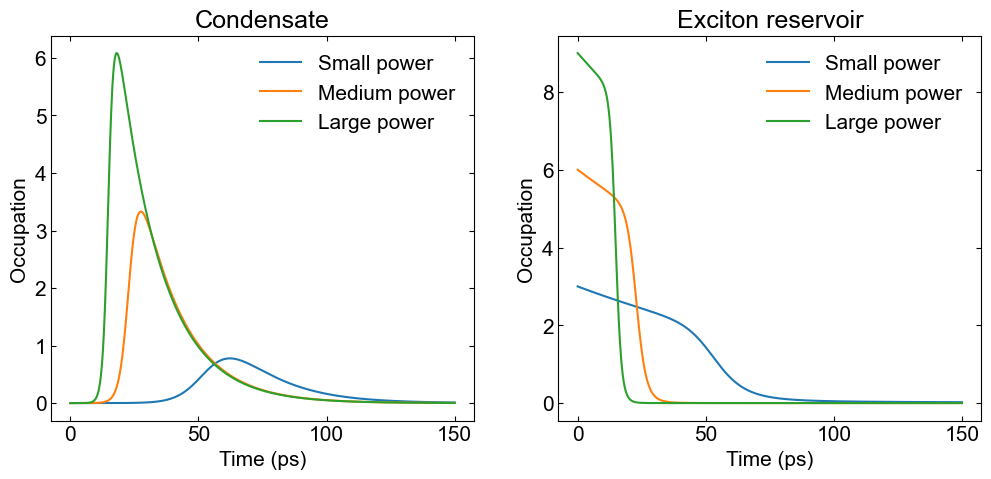

In [60]:
fig, ax = plt.subplots(1,2, figsize=(12, 5), facecolor='w', edgecolor='k')   # new canva for a plot
ax[0].plot(time, sol1[0], label = 'Small power') #
ax[0].plot(time, sol2[0], label = 'Medium power') # 
ax[0].plot(time, sol3[0], label = 'Large power') # 
ax[0].set_xlabel('Time (ps)') # x label
ax[0].set_ylabel('Occupation') # y label
ax[0].set_title('Condensate')
ax[0].legend(frameon=False)
ax[0].tick_params(axis='both', direction = "in", which='major',
       right = True, top = True, left = True) # ticks properties

ax[1].plot(time, np.real(sol1[1]), label = 'Small power') # 
ax[1].plot(time, np.real(sol2[1]), label = 'Medium power') # 
ax[1].plot(time, np.real(sol3[1]), label = 'Large power') #
ax[1].set_xlabel('Time (ps)') # x label
ax[1].set_ylabel('Occupation') # y label
ax[1].set_title('Exciton reservoir')
ax[1].legend(frameon=False)
ax[1].tick_params(axis='both', direction = "in", which='major',
       right = True, top = True, left = True) # ticks properties
plt.show() # showing the plot